In [119]:
%matplotlib inline
from azureml import Workspace
import pandas as pd
import matplotlib.pyplot as plt




In [133]:

ws = Workspace()
ds = ws.datasets['Equity.csv']
frame = ds.to_dataframe()

In [134]:
frame.head()

,Ticker,Date,Open,High,Low,Close,Volume,MarketCap
0,000001 CH Equity,2007-01-04,4.076,4.262,3.848,3.926,248746862.0,27455.5194
1,000001 CH Equity,2007-01-05,3.876,3.876,3.617,3.634,193128903.0,25412.4085
2,000001 CH Equity,2007-01-08,3.631,3.767,3.622,3.720,114158669.0,26015.6127
3,000001 CH Equity,2007-01-09,3.725,3.862,3.700,3.839,172408580.0,26852.3153
4,000001 CH Equity,2007-01-10,3.837,3.959,3.784,3.917,160797032.0,27397.1448


In [136]:
pivotted = frame.pivot(index="Date", columns="Ticker", values="Close")

In [62]:
pivotted.head(10)

Open                                    \
Ticker     000001 CH Equity 000027 CH Equity 000039 CH Equity   
Date                                                            
2007-01-01              NaN              NaN              NaN   
2007-01-02              NaN              NaN              NaN   
2007-01-03              NaN              NaN              NaN   
2007-01-04            4.076            4.656           15.933   
2007-01-05            3.876            4.667           15.250   
2007-01-07              NaN              NaN              NaN   
2007-01-08            3.631            5.033           15.225   
2007-01-09            3.725            5.333           15.875   
2007-01-10            3.837            5.278           17.125   
2007-01-11            3.945            5.356           17.083   

                                                               \
Ticker     000046 CH Equity 000063 CH Equity 000069 CH Equity   
Date                                                            
2007-01-01              NaN              NaN              NaN   
2007-01-02              NaN              NaN              NaN   
2007-01-03              NaN              NaN              NaN   
2007-01-04            4.778            9.987            4.705   
2007-01-05            4.903            9.755            4.765   
2007-01-07              NaN              NaN              NaN   
2007-01-08            4.888            9.921            4.611   
2007-01-09            5.200           10.175            4.489   
2007-01-10            5.375           10.226            4.466   
2007-01-11            5.575           10.646            4.455   

                                                               \
Ticker     000100 CH Equity 000156 CH Equity 000157 CH Equity   
Date                                                            
2007-01-01              NaN              NaN              NaN   
2007-01-02              NaN              NaN              NaN   
2007-01-03              NaN              NaN              NaN   
2007-01-04            1.190              NaN            2.089   
2007-01-05            1.200              NaN            2.135   
2007-01-07              NaN              NaN              NaN   
2007-01-08            1.235              NaN            2.143   
2007-01-09            1.300              NaN            2.110   
2007-01-10            1.315              NaN            2.145   
2007-01-11            1.445              NaN            2.140   

                                 ...            MarketCap                \
Ticker     000166 CH Equity      ...       YPFD AR Equity YUM US Equity   
Date                             ...                                      
2007-01-01              NaN      ...                  NaN           NaN   
2007-01-02              NaN      ...           57423.6749           NaN   
2007-01-03              NaN      ...           55850.4236    15602.3961   
2007-01-04              NaN      ...           55063.7979    15559.9838   
2007-01-05              NaN      ...           55063.7979    15424.7949   
2007-01-07              NaN      ...                  NaN           NaN   
2007-01-08              NaN      ...           54277.1722    15387.6842   
2007-01-09              NaN      ...           54277.1722    15446.0010   
2007-01-10              NaN      ...           54277.1722    15591.7930   
2007-01-11              NaN      ...           54277.1722    15904.5831   

                                                                    \
Ticker      Z IN Equity ZAL GR Equity ZAYO US Equity ZBH US Equity   
Date                                                                 
2007-01-01          NaN           NaN            NaN           NaN   
2007-01-02  124547.6895           NaN            NaN           NaN   
2007-01-03  123008.9856           NaN            NaN    18399.8075   
2007-01-04  124656.0484           NaN            NaN    18810.2831   
2007-01-05  122077.

In [78]:
UScompanies = ["LMT US Equity", "GD US Equity", "RTN US Equity", "NOC US Equity", "OA US Equity"]
UKcompanies = ["BA/ LN Equity"]
CHcompanies = ["CH Equity"]
KRcompanies = ["KS Equity"]

USDef = pivotted.filter(items=UScompanies)
USDef["index"] = (USDef["LMT US Equity"] + USDef["GD US Equity"] + USDef["RTN US Equity"] + USDef["NOC US Equity"])/4
# 601718 CH Equity	Jihua Group Corp Ltd	CNY
# FNC IM Equity	Leonardo SpA	EUR
# BA/ LN Equity	BAE Systems PLC	GBp
# 047810 KS Equity	Korea Aerospace Industries Ltd	KRW
# LMT US Equity	Lockheed Martin Corp	USD
# GD US Equity	General Dynamics Corp	USD
# RTN US Equity	Raytheon Co	USD
# NOC US Equity	Northrop Grumman Corp	USD
# HII US Equity	Huntington Ingalls Industries	USD
# OA US Equity	Orbital ATK Inc	USD


In [131]:
USDef.tail(3)

Ticker,LMT US Equity,GD US Equity,RTN US Equity,NOC US Equity,index
Date,,,,,
2017-03-06,267.720,190.94,153.32,242.92,213.72500
2017-03-07,269.040,191.47,154.48,243.78,214.69250
2017-03-08,268.235,190.73,154.36,243.71,214.25875


In [129]:
from datetime import datetime

DFindex = index.dropna()
DFindex = USDef["index"]
dates = DFindex.index.values
dates_formatted = []
for date in dates:
    fm_date = datetime.strptime(date, '%Y-%m-%d')
    dates_formatted.append(fm_date)


In [ ]:
ws = Workspace()
ds = ws.datasets['refugeeClean.csv']
frame = ds.to_dataframe()

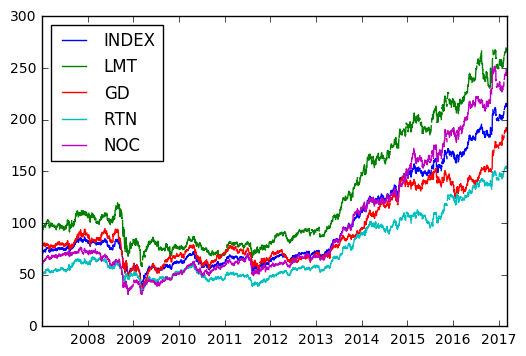

In [132]:
plt.plot(dates_formatted, DFindex)
plt.plot(dates_formatted, USDef["LMT US Equity"] )
plt.plot(dates_formatted, USDef["GD US Equity"] )
plt.plot(dates_formatted, USDef["RTN US Equity"] )
plt.plot(dates_formatted, USDef["NOC US Equity"] )


plt.legend(['INDEX', 'LMT', 'GD', 'RTN','NOC'], loc='upper left')


SyntaxError: 'return' outside function (<ipython-input-126-718efe2ded7d>, line 1)